<a href="https://colab.research.google.com/github/BrianHall1992/LAGCC-Capstone/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm beginning by importing the diabetes dataset, with the purpose of discovering how medical indicators affect length of stay within hospitals. As an analyst who works in healthcare, this project is of particuar interest to me. I will be investigating how diabetes and other medical indicators affect length of stay within hospitals. The unit of measurement I'm most concerned with is length of stay within hospitals for an individual encounter, and secondarily how it relates to readmission/other factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
%matplotlib inline

from google.colab import files
uploaded = files.upload()







Saving diabetic_data.csv to diabetic_data.csv


The above steps pull in the csv from my desktop as I'm writing this, but will place it in github for ease

In [2]:
import io

In [3]:
df= pd.read_csv(io.StringIO(uploaded['diabetic_data.csv'].decode('utf-8')),na_values='?')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


The below code limits to the columns of interest, as well as limiting using the discharge disposition id to limit to encounters that are admitted as an inpatient to the hospital

In [4]:
columns = ['num_lab_procedures','num_medications','encounter_id','patient_nbr','race','gender','age','weight','admission_type_id','admission_source_id','number_diagnoses','time_in_hospital','readmitted','diabetesMed','medical_specialty']

df2=df[columns]
df2.tail()

,num_lab_procedures,num_medications,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,admission_source_id,number_diagnoses,time_in_hospital,readmitted,diabetesMed,medical_specialty
101761,51,16,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,7,9,3,>30,Yes,NaN
101762,33,18,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,5,9,5,NO,Yes,NaN
101763,53,9,443854148,41088789,Caucasian,Male,[70-80),NaN,1,7,13,1,NO,Yes,NaN
101764,45,21,443857166,31693671,Caucasian,Female,[80-90),NaN,2,7,9,10,NO,Yes,Surgery-General
101765,13,3,443867222,175429310,Caucasian,Male,[70-80),NaN,1,7,9,6,NO,No,NaN


First, I will reduce the number of columns to some of interest, and visually inspect how each encounter and length of stay look on a tables. One thing I've learned is that the max length of stay per encounter is 14 days.

In [ ]:
df2.groupby('diabetesMed').agg({'time_in_hospital':['mean','min','max','std']})

time_in_hospital                  
                        mean min max       std
diabetesMed                                   
No                  4.054480   1  14  2.893131
Yes                 4.497977   1  14  3.004532

In [23]:
df2.groupby('admission_source_id').agg({'time_in_hospital':['mean','median','count']})

time_in_hospital              
                                mean median  count
admission_source_id                               
1                           4.257805    3.0  29565
2                           4.684783    4.0   1104
3                           4.823529    4.0    187
4                           5.814559    5.0   3187
5                           5.829240    5.0    855
6                           4.426237    4.0   2264
7                           4.387519    4.0  57494
8                           5.562500    4.0     16
9                           3.416000    3.0    125
10                          4.375000    2.5      8
11                          2.500000    2.5      2
13                          3.000000    3.0      1
14                          3.000000    3.0      2
17                          4.155729    3.0   6781
20                          4.577640    4.0    161
22                         10.000000   10.5     12
25                          6.000000    6.0      2

[Text(0, 0, 'Caucasian'),
 Text(0, 0, 'AfricanAmerican'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Other')]

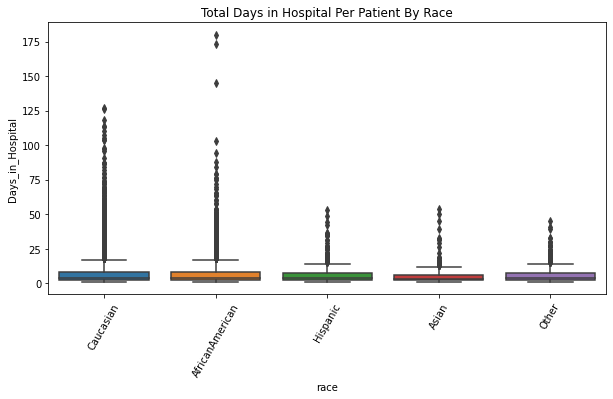

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
dfr=df2.groupby(['patient_nbr','race','age','gender']).agg(Days_in_Hospital=('time_in_hospital','sum'),
                                            Encounters = ('encounter_id','nunique'),
                                            Diagnoses = ('number_diagnoses','sum'),
                                            Lab_tests = ('num_lab_procedures','sum')
                                            )
dfr.reset_index(inplace=True)
dfr.head()
chart_r= sns.boxplot(x='race',y='Days_in_Hospital',data=dfr,ax=ax)
plt.title('Total Days in Hospital Per Patient By Race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

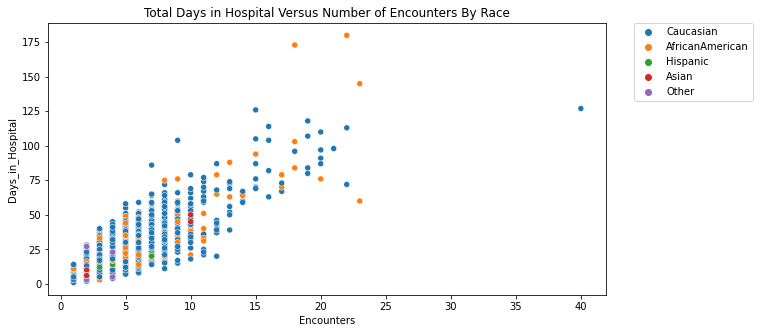

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Encounters',y='Days_in_Hospital', hue='race', data=dfr)
plt.title('Total Days in Hospital Versus Number of Encounters By Race')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

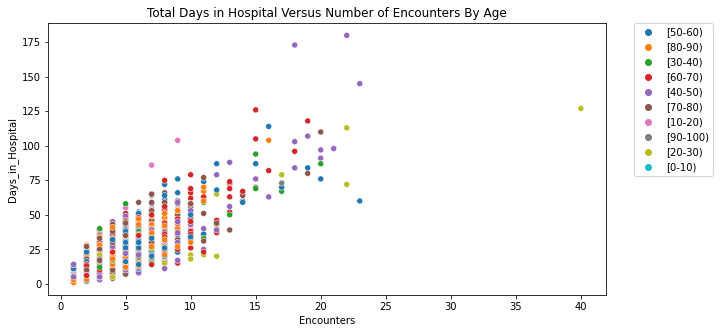

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Encounters',y='Days_in_Hospital', hue='age', data=dfr)
plt.title('Total Days in Hospital Versus Number of Encounters By Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

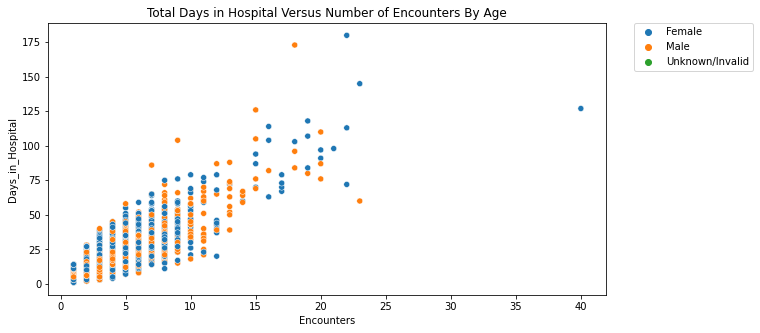

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Encounters',y='Days_in_Hospital', hue='gender', data=dfr)
plt.title('Total Days in Hospital Versus Number of Encounters By Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [55]:
dfr.groupby('race').agg({'Days_in_Hospital':['mean','min','max','std','count']})

Days_in_Hospital                          
                            mean min  max       std  count
race                                                      
AfricanAmerican         6.696257   1  180  7.424067  12932
Asian                   4.953578   1   54  5.848356    517
Caucasian               6.226544   1  144  6.397825  53601
Hispanic                5.391134   1   53  5.264270   1534
Other                   5.323408   1   45  5.156535   1209

In [20]:
dfr.groupby('age').agg({'Days_in_Hospital':['mean','median','min','max','std']})

Days_in_Hospital                          
                     mean median min  max       std
age                                                
[0-10)           2.666667      3   1    8  1.322876
[10-20)          4.151803      3   1  104  7.262573
[20-30)          5.212149      3   1  127  7.945616
[30-40)          5.282388      3   1   94  6.478353
[40-50)          5.649211      4   1  180  7.523797
[50-60)          5.638458      4   1  114  6.167716
[60-70)          6.072710      4   1  126  6.287201
[70-80)          6.448950      5   1  110  6.057745
[80-90)          6.885600      5   1  104  6.055650
[90-100)         6.504781      5   1   73  5.473396

[Text(0, 0, '[50-60)'),
 Text(0, 0, '[80-90)'),
 Text(0, 0, '[30-40)'),
 Text(0, 0, '[60-70)'),
 Text(0, 0, '[40-50)'),
 Text(0, 0, '[70-80)'),
 Text(0, 0, '[10-20)'),
 Text(0, 0, '[90-100)'),
 Text(0, 0, '[20-30)'),
 Text(0, 0, '[0-10)')]

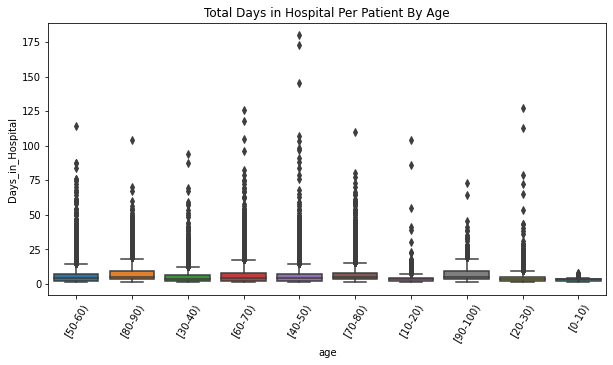

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
chart_a= sns.boxplot(x='age',y='Days_in_Hospital',data=dfr,ax=ax)
plt.title('Total Days in Hospital Per Patient By Age')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

In [ ]:
df2.groupby('number_diagnoses').agg({'time_in_hospital':['mean']})

,time_in_hospital
,mean
number_diagnoses,
1,2.310502
2,2.614858
3,2.825044
4,3.203540
5,3.781620
6,3.879146
7,4.005966
8,4.319989


In [47]:
df2.groupby('gender').agg({'time_in_hospital':['mean','min','max','std','count']})

time_in_hospital                         
                            mean min max       std  count
gender                                                   
Female                  4.478797   1  14  2.980388  54708
Male                    4.299777   1  14  2.987703  47055
Unknown/Invalid         3.333333   1   8  4.041452      3

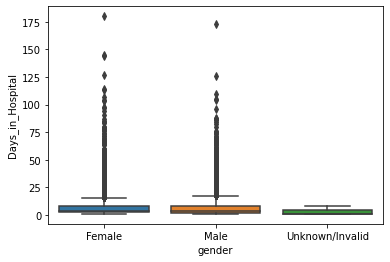

In [46]:
dfg=df2.groupby(['patient_nbr','gender']).agg(Days_in_Hospital=('time_in_hospital','sum'))
dfg.reset_index(inplace=True)
dfg.head()
sns.boxplot(x='gender',y='Days_in_Hospital',data=dfg)

In [ ]:
df_spec=df2.groupby('medical_specialty').agg({'time_in_hospital':['mean']}).sort_values(by=('time_in_hospital','mean'),ascending=False)

In [ ]:
df2.groupby('readmitted').agg({'time_in_hospital':['mean','min','max','std']})

time_in_hospital                  
                       mean min max       std
readmitted                                   
<30                4.768249   1  14  3.028165
>30                4.495541   1  14  2.988064
NO                 4.254429   1  14  2.964964